# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#MM added code
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #MM added code
    city_url = {"q": city, "appid": weather_api_key, "units": "metric"}
    response = requests.get(url, params=city_url)
    #print(response)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        data_json = response.json()
        
        #Test: what does the JSON of my 1st city look like
        # if(i == 0):
        #     #print(data_json)
        #     print(json.dumps(data_json, indent=4, sort_keys=True))
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data_json["coord"]["lat"]
        city_lng = data_json["coord"]["lon"]
        city_max_temp = data_json["main"]["temp_max"]
        city_humidity = data_json["main"]["humidity"]
        city_clouds = data_json["clouds"]["all"]
        city_wind = data_json["wind"]["speed"]
        city_country = data_json["sys"]["country"]
        city_date = data_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

      # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | rabo de peixe
Processing Record 3 of Set 1 | tezu
Processing Record 4 of Set 1 | carolina beach
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | olyokminsk
Processing Record 9 of Set 1 | lihue
Processing Record 10 of Set 1 | utrik
Processing Record 11 of Set 1 | meadow lake
Processing Record 12 of Set 1 | berezovyy
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | sisimiut
Processing Record 16 of Set 1 | nizhnesortymskiy
Processing Record 17 of Set 1 | chubek
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | dryden
Processing Record 21 of Set 1 | northam
Processing Record 22 of Set 1 | jamestown
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.json_normalize(city_data)
# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,25.03,73,75,3.09,CK,1715480380
1,rabo de peixe,37.8000,-25.5833,17.77,99,75,1.54,PT,1715480380
2,tezu,27.9167,96.1667,29.06,34,3,1.64,IN,1715480380
3,carolina beach,34.0352,-77.8936,20.01,81,0,2.86,US,1715480305
4,albany,42.6001,-73.9662,12.73,70,100,2.37,US,1715480381


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,25.03,73,75,3.09,CK,1715480380
1,rabo de peixe,37.8000,-25.5833,17.77,99,75,1.54,PT,1715480380
2,tezu,27.9167,96.1667,29.06,34,3,1.64,IN,1715480380
3,carolina beach,34.0352,-77.8936,20.01,81,0,2.86,US,1715480305
4,albany,42.6001,-73.9662,12.73,70,100,2.37,US,1715480381


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

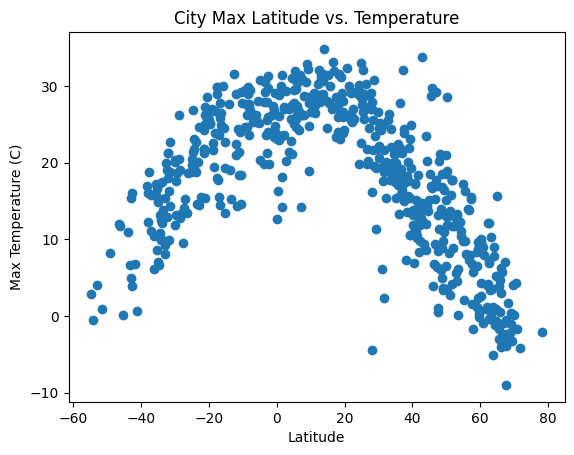

In [8]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

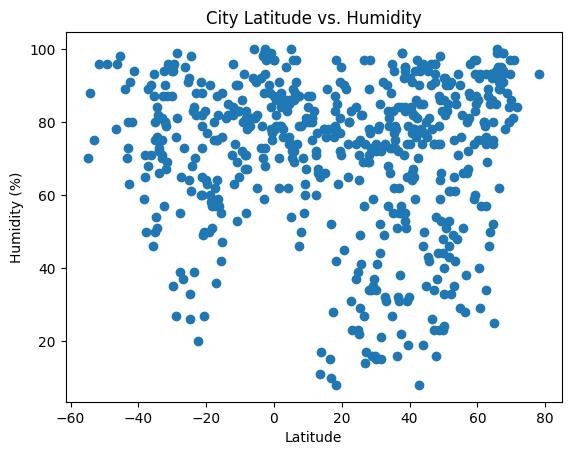

In [9]:
# Build the scatter plots for latitude vs. humidity

# Incorporate the other graph properties
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

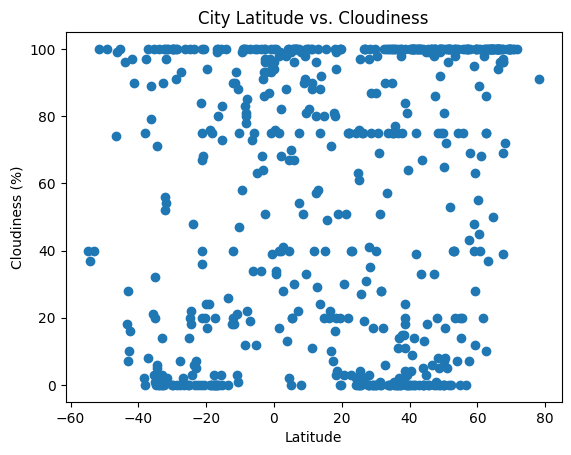

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties

x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("float")

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

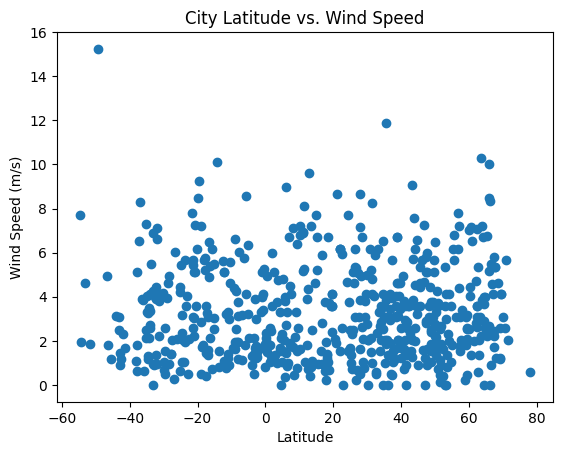

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [81]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def lin_regress(df,xvals,yvals):
    x_val = df[xvals].astype("float")
    y_val = df[yvals].astype("float")

    # Plot scatter plot
    plt.scatter(x_val,y_val)

    # Label plot
    plt.xlabel(xvals)
    plt.ylabel(yvals)
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot regression line
    plt.plot(x_val,regress_values,"r-")
    plt.annotate(line_eq,(df[xvals].mean(),df[yvals].mean()),fontsize=15,color="black")
    # Print r square value
    print(f"The r-value is: {rvalue**2}")

In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rabo de peixe,37.8000,-25.5833,17.77,99,75,1.54,PT,1715480380
2,tezu,27.9167,96.1667,29.06,34,3,1.64,IN,1715480380
3,carolina beach,34.0352,-77.8936,20.01,81,0,2.86,US,1715480305
4,albany,42.6001,-73.9662,12.73,70,100,2.37,US,1715480381
6,olyokminsk,60.3736,120.4264,9.65,40,89,4.43,RU,1715480381


In [83]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,25.03,73,75,3.09,CK,1715480380
5,grytviken,-54.2811,-36.5092,-0.52,88,37,1.93,GS,1715480381
11,waitangi,-43.9535,-176.5597,11.01,89,96,3.13,NZ,1715480382
16,blackmans bay,-43.0167,147.3167,15.41,73,28,0.89,AU,1715480383
25,suva,-18.1416,178.4415,26.71,57,75,5.66,FJ,1715480385


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6879085528841874


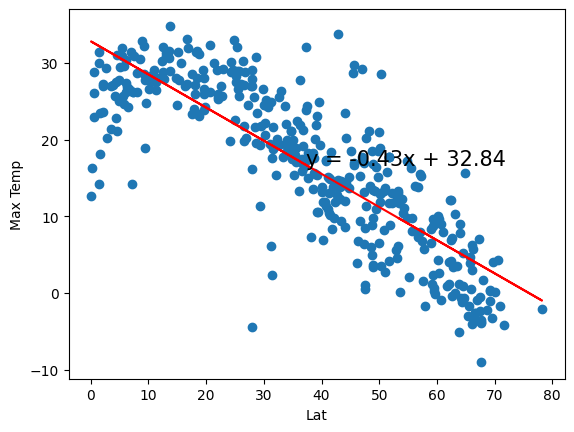

In [84]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
lin_regress(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.620057064169868


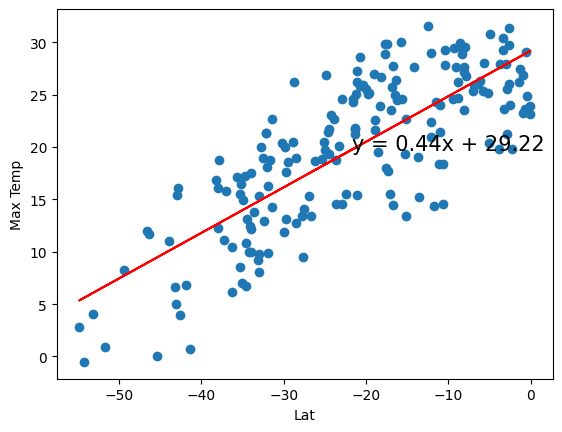

In [85]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
lin_regress(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** According to both northern & southern hemisphere graphs, an R^2 value above 0.6 for both graphs suggests a substantial, correlation between Temperature and Latitude. Temperatures reach their highest as latitude approaches the equator at 0. Then, temperature decreases at an average rate of 0.44 degrees Celsius per 1 degree of latitude as one moves farther away from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.006627651620113167


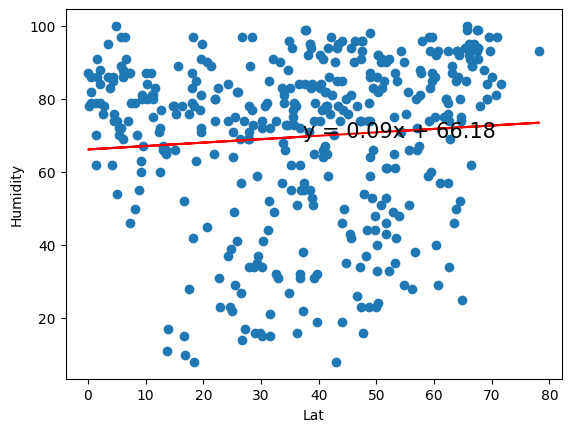

In [86]:
# Northern Hemisphere
lin_regress(northern_hemi_df, "Lat", "Humidity")

The r-value is: 0.0043866989635424885


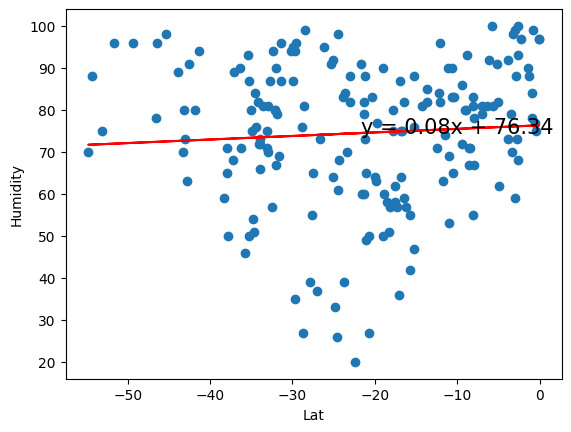

In [87]:
# Southern Hemisphere
lin_regress(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** An R^2 value of 0.006 for both Humidity and Latitude graphs suggests an extremely weak correlation. According to both northern and souther linear regression graphs, humidity remains relatively constant as we approah or depart from the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.026235624112747852


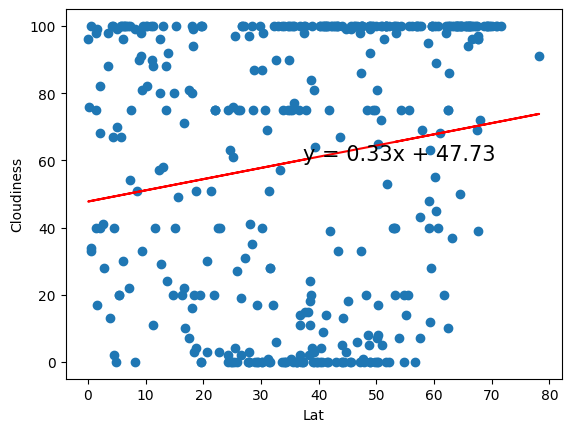

In [88]:
# Northern Hemisphere
lin_regress(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: 0.0410731152894682


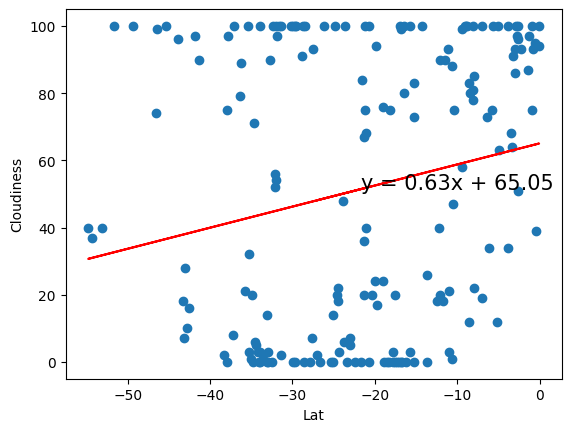

In [89]:
# Southern Hemisphere
lin_regress(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship: Cloudiness and Latitude are also weakly correlated as reported by an R^2 value of 0.04. The linear regression model is not a good representation of the northern and southern data sets.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0020979475225231113


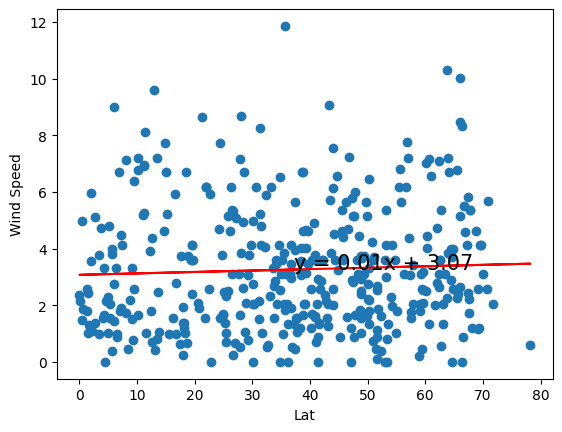

In [90]:
# Northern Hemisphere
lin_regress(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: 0.00421348782716481


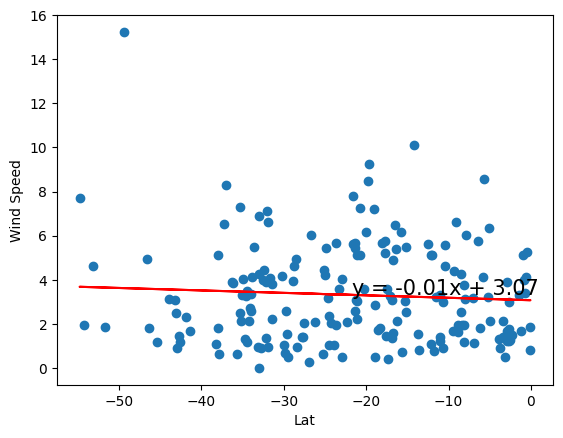

In [91]:
# Southern Hemisphere
lin_regress(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** An R^2 value of 0.004 suggests that Wind Speed and Latitude are loosely correlated as well. Once plotted, the data seems random and does not fit the lienar regression model.